**Mi primer modelo de Machine Learning**:

Prediccion de tiempos de maraton

**FASE 1. Preparacion de datos**

Primero cargamos el archivo CSV


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving datos.csv to datos (1).csv


In [ ]:
import io
datos_maraton = pd.read_csv(io.BytesIO(uploaded['datos (1).csv']))

Hacemos una primera inspeccion para ver que se haya cargado bien

In [ ]:
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,26.7,64.0
2,2022-10-31 16:10:07,26.7,62.0
3,2022-10-31 16:10:12,26.7,62.0
4,2022-10-31 16:10:17,26.7,62.0
...,...,...,...
841,2022-10-31 17:59:14,23.0,71.0
842,2022-10-31 17:59:19,23.0,71.0
843,2022-10-31 17:59:24,23.0,71.0
844,2022-10-31 17:59:52,23.0,71.0


Voy a ver solo una columna ...

In [ ]:
datos_maraton["Temperatura"]

0       0.0
1      26.7
2      26.7
3      26.7
4      26.7
       ... 
841    23.0
842    23.0
843    23.0
844    23.0
845    23.0
Name: Temperatura, Length: 846, dtype: float64

Vamos a "olfatear" los datos, viendo su composicion, estadisticas etc ..

In [ ]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        846 non-null    object 
 1   Temperatura  846 non-null    float64
 2   Humedad      846 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.0+ KB


Pasamos de object a numerico

In [ ]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

In [ ]:
datos_maraton.describe()

,Temperatura,Humedad
count,846.000000,846.000000
mean,23.953428,69.334515
std,1.661847,4.461052
min,0.000000,0.000000
25%,22.600000,67.000000
50%,24.150000,70.000000
75%,24.800000,73.000000
max,28.900000,77.000000


array([[<Axes: title={'center': 'Temperatura'}>,
        <Axes: title={'center': 'Humedad'}>]], dtype=object)

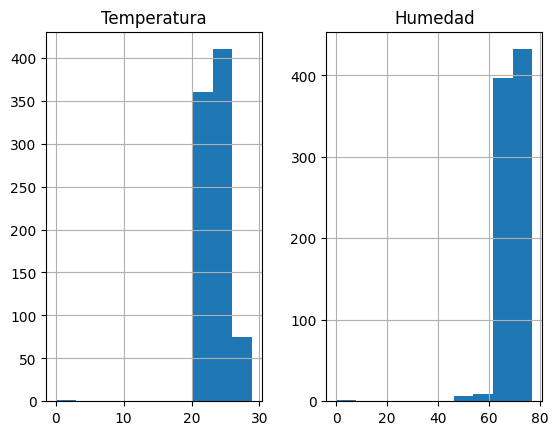

In [ ]:
datos_maraton.hist()

vamos a eliminar las columnas que no tienen sentido

In [ ]:
# datos_maraton = datos_maraton.drop(columns=['Name'])
# datos_maraton = datos_maraton.drop(columns=['id'])
# datos_maraton = datos_maraton.drop(columns=['Marathon'])
# datos_maraton = datos_maraton.drop(columns=['CATEGORY'])
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,26.7,64.0
2,2022-10-31 16:10:07,26.7,62.0
3,2022-10-31 16:10:12,26.7,62.0
4,2022-10-31 16:10:17,26.7,62.0
...,...,...,...
841,2022-10-31 17:59:14,23.0,71.0
842,2022-10-31 17:59:19,23.0,71.0
843,2022-10-31 17:59:24,23.0,71.0
844,2022-10-31 17:59:52,23.0,71.0


Vamos a ver si "faltan" datos

In [ ]:
datos_maraton.isna().sum()

Fecha          0
Temperatura    0
Humedad        0
dtype: int64

Lo vamos a rellenar con ceros

In [ ]:
datos_maraton["Temperatura"] = datos_maraton["Humedad"].fillna(0)
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,64.0,64.0
2,2022-10-31 16:10:07,62.0,62.0
3,2022-10-31 16:10:12,62.0,62.0
4,2022-10-31 16:10:17,62.0,62.0
...,...,...,...
841,2022-10-31 17:59:14,71.0,71.0
842,2022-10-31 17:59:19,71.0,71.0
843,2022-10-31 17:59:24,71.0,71.0
844,2022-10-31 17:59:52,71.0,71.0


El resto los elimino ...

In [ ]:
datos_maraton = datos_maraton.dropna(how='any')
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,64.0,64.0
2,2022-10-31 16:10:07,62.0,62.0
3,2022-10-31 16:10:12,62.0,62.0
4,2022-10-31 16:10:17,62.0,62.0
...,...,...,...
841,2022-10-31 17:59:14,71.0,71.0
842,2022-10-31 17:59:19,71.0,71.0
843,2022-10-31 17:59:24,71.0,71.0
844,2022-10-31 17:59:52,71.0,71.0


Vamos a tratar los datos no numericos

In [ ]:
datos_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

Los reemplazo por un valor numerico

In [ ]:
# valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
# datos_maraton.replace(valores_cross, inplace=True)
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,64.0,64.0
2,2022-10-31 16:10:07,62.0,62.0
3,2022-10-31 16:10:12,62.0,62.0
4,2022-10-31 16:10:17,62.0,62.0
...,...,...,...
841,2022-10-31 17:59:14,71.0,71.0
842,2022-10-31 17:59:19,71.0,71.0
843,2022-10-31 17:59:24,71.0,71.0
844,2022-10-31 17:59:52,71.0,71.0


In [ ]:
datos_maraton['Temperatura'].unique()

array([ 0., 64., 62., 63., 68., 69., 72., 73., 75., 76., 74., 71., 70.,
       67., 66., 65., 60., 59., 58., 57., 54., 53., 52., 51., 50., 77.])

In [ ]:
datos_maraton['Humedad'].unique()

array([ 0., 64., 62., 63., 68., 69., 72., 73., 75., 76., 74., 71., 70.,
       67., 66., 65., 60., 59., 58., 57., 54., 53., 52., 51., 50., 77.])

In [ ]:
# valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
# datos_maraton.replace(valores_categoria, inplace=True)
datos_maraton

,Fecha,Temperatura,Humedad
0,2022-10-31 16:04:18,0.0,0.0
1,2022-10-31 16:10:02,64.0,64.0
2,2022-10-31 16:10:07,62.0,62.0
3,2022-10-31 16:10:12,62.0,62.0
4,2022-10-31 16:10:17,62.0,62.0
...,...,...,...
841,2022-10-31 17:59:14,71.0,71.0
842,2022-10-31 17:59:19,71.0,71.0
843,2022-10-31 17:59:24,71.0,71.0
844,2022-10-31 17:59:52,71.0,71.0


Vamos a analizarlos de nuevo, pintando algunas graficas

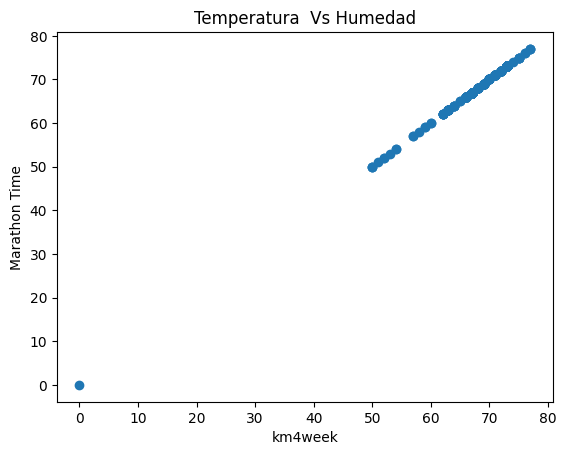

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['Temperatura'], y=datos_maraton['Humedad'])
plt.title('Temperatura  Vs Humedad')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

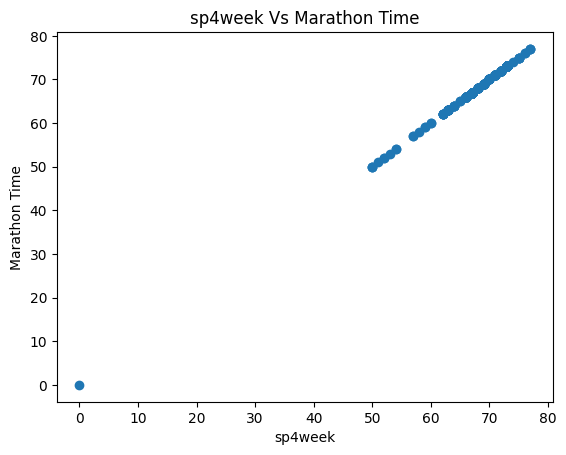

In [ ]:
plt.scatter(x = datos_maraton['Temperatura'], y=datos_maraton['Humedad'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

vamos a eliminar ese "outlier"

In [ ]:
datos_maraton = datos_maraton.query('Humedad > 0.01 & Humedad < 1000')

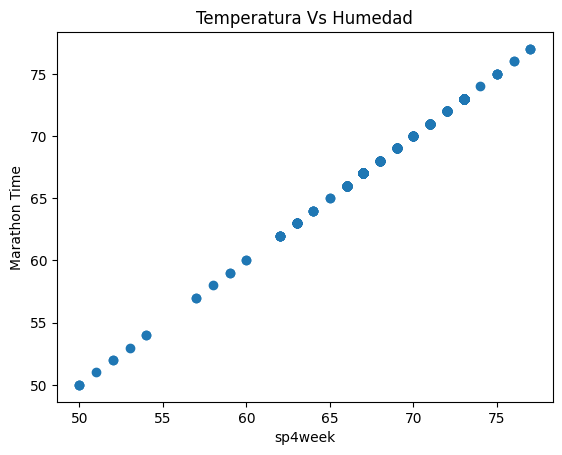

In [ ]:
plt.scatter(x = datos_maraton['Temperatura'], y=datos_maraton['Humedad'])
plt.title('Temperatura Vs Humedad')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

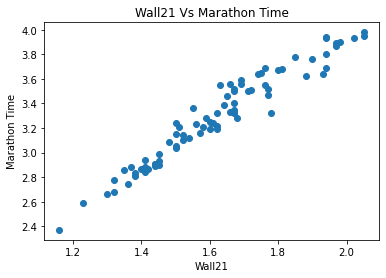

In [ ]:
plt.scatter(x = datos_maraton['Wall21'], y=datos_maraton['MarathonTime'])
plt.title('Wall21 Vs Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

In [ ]:
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


**FASE 2. Entrenamiento del modelo**

Separamos los datos entre entrenamiento (80%) y test (20%)

In [ ]:
datos_entrenamiento = datos_maraton.sample(frac=0.8,random_state=0)
datos_test = datos_maraton.drop(datos_entrenamiento.index)

In [ ]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [ ]:
datos_test

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
9,2,84.2,13.365079,0,1.35,2.86
12,2,53.5,14.078947,3,1.37,2.88
21,3,67.3,13.239344,0,1.50,3.04
26,6,129.6,12.188088,0,1.54,3.12
38,1,64.7,13.294521,0,1.50,3.24
39,6,69.2,10.053269,0,1.60,3.25
41,5,58.8,12.829091,0,1.68,3.28
46,6,48.6,12.252101,0,1.66,3.33
48,2,60.1,12.182432,0,1.55,3.36
49,1,78.2,12.000000,0,1.64,3.39


Marcamos el valor a predecir

In [ ]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

KeyError: ignored

In [ ]:
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [ ]:
etiquetas_test

9     2.86
12    2.88
21    3.04
26    3.12
38    3.24
39    3.25
41    3.28
46    3.33
48    3.36
49    3.39
62    3.56
68    3.65
69    3.67
71    3.69
75    3.78
83    3.93
Name: MarathonTime, dtype: float64

In [ ]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


Vamos a entrenar nuestro modelo, una regresion lineal muy simple!

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ejecuto las predicciones para los datos de test que habia "guardado"

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

Los comparo con el valor real

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 11.030345


No esta mal, mis predicciones tendra un grado de acierto de 11%

Ejecuto una prediccion para un nuevo corredor

In [ ]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [ ]:
modelo.predict(nuevo_corredor)

array([2.199872])